# MNIST Classification
Criando uma rede para classificação da base de dados **MNIST**, caracterizada por ser digitos de 0 a 9 escritos a mão.

## Setup
Carregando bibliotecas e gerando seed para reprodução do código.

In [38]:
# Bibliotecas
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

# Setando o seed
np.random.seed(123)

## Carregando os dados
Carregando os dados direto da biblioteca do *keras*.

In [39]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [40]:
print('X train: ', X_train.shape)
print('y train: ', y_train.shape)
print('X test: ', X_test.shape)
print('y test:', y_test.shape)

X train:  (60000, 28, 28)
y train:  (60000,)
X test:  (10000, 28, 28)
y test: (10000,)


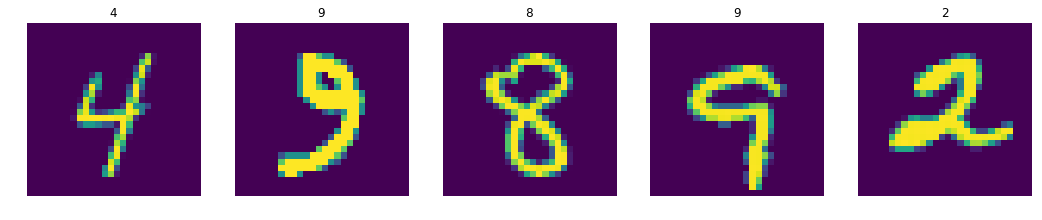

In [41]:
# Plotando uma amostra
from matplotlib import pyplot as plt
%matplotlib inline

idxs = np.arange(X_train.shape[0])
np.random.shuffle(idxs)

imgs_to_show = X_train[idxs[:5]]

plt.figure(figsize=(18,9))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(imgs_to_show[i])
    plt.axis('off')
    plt.title(y_train[idxs[i]])

## Pré-processamento
Utilizando *Theano* ou *TensorFlow* como *backend* faz-se necessário explicitar a dimensão de profundidade da imagem. Como na base de dados **MNIST** não se usa o *RGB*, e sim o *gray-scale*, essa profundidade é 1, mas, mesmo assim, temos que especificar. 

No *Theano* o shape resultante fica: (1, 28, 28), no *TensorFlow*  fica: (28, 28, 1).

In [42]:
X_test_raw = X_test

In [43]:
# Reshape
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

print('X train: ', X_train.shape)
print('X test: ', X_test.shape)

X train:  (60000, 28, 28, 1)
X test:  (10000, 28, 28, 1)


Um pré-processamento final será modificar os tipos de dados para *float32* (para melhor utilização da memória) e normalizar os dados pelo número máximo de cada característica (como o número máximo em *gray-scale* é 255, então dividir todas as características por 255).

In [44]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

O pré-processamento dos labels é feito transformando o vetor em *one-hot*. 

In [45]:
print(y_train.shape)
print(y_train[:5])

(60000,)
[5 0 4 1 9]


In [46]:
# Convertendo o vetor de labels em one-hot
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

print('y train: ', y_train.shape)
print('y test: ', y_test.shape)
print('Deverá mostrar 5 como a classe:')
print(y_train[0])

y train:  (60000, 10)
y test:  (10000, 10)
Deverá mostrar 5 como a classe:
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


## Definindo a arquitetura do modelo
Definindo a arquitetura do modelo para a classificação da base de dados **MNIST**.

* **Conv2D** - 32 filtros, 3x3 conv
* **Conv2D** - 32 filtros, 3x3 conv
* **MaxPool** - 2x2
* **Dropout** - 0.25
* **FC** - 128 neurônios
* **Dropout** - 0.5
* **FC** - 10 neurônios

In [47]:
# Definindo o modelo
model = Sequential()

model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), name='conv1'))
model.add(Convolution2D(32, (3, 3), activation='relu', name='conv2'))
model.add(MaxPooling2D(pool_size=(2,2), name='max-pool'))
model.add(Dropout(0.25, name='dropout-conv'))

model.add(Flatten())
model.add(Dense(128, activation='relu', name='fc'))
model.add(Dropout(0.5, name='dropout-fc'))
model.add(Dense(10, activation='softmax', name='output-layer'))

print('Deve ser (None, 10):')
print(model.output_shape)

Deve ser (None, 10):
(None, 10)


## Compilando o modelo
Para compilar o modelo é necessário definir alguns métodos, como a função de *loss* e o método de otimização utilizado.

O **Keras** tem uma variedade de [funções de *loss*](https://keras.io/objectives/) e de [otimizadores](https://keras.io/optimizers/) para escolher. Nós vamos optar por *Categorical Cross Entropy* e o *Adam Optimizer*.

In [48]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Treinando o modelo
O treinamento é feito de acordo com a função *fit*. Para uma melhor visualização do treinamento, é possível utilizar os [callbacks](https://keras.io/callbacks/) disponíveis pelo **Keras**.

In [49]:
model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 65s - loss: 0.1984 - acc: 0.9399    
Epoch 2/10
60000/60000 [==============================] - 65s - loss: 0.0876 - acc: 0.9738    
Epoch 3/10
60000/60000 [==============================] - 66s - loss: 0.0659 - acc: 0.9799    
Epoch 4/10
60000/60000 [==============================] - 66s - loss: 0.0544 - acc: 0.9836    
Epoch 5/10
60000/60000 [==============================] - 66s - loss: 0.0479 - acc: 0.9849    
Epoch 6/10
60000/60000 [==============================] - 66s - loss: 0.0419 - acc: 0.9870    
Epoch 7/10
60000/60000 [==============================] - 66s - loss: 0.0368 - acc: 0.9887    
Epoch 8/10
60000/60000 [==============================] - 66s - loss: 0.0341 - acc: 0.9890    
Epoch 9/10
60000/60000 [==============================] - 66s - loss: 0.0296 - acc: 0.9906    
Epoch 10/10
60000/60000 [==============================] - 66s - loss: 0.0289 - acc: 0.9907    


## Avaliando o modelo
A avaliação do modelo é feita pela função *evaluate*.

In [50]:
[loss, test_acc] = model.evaluate(X_test, y_test, verbose=1)
print('\nO desempenho de teste foi de %.2f%%' % (100*test_acc))

 9824/10000 [============================>.] - ETA: 0s
O desempenho de teste foi de 99.17%


## Saliency Maps
Será tentado encontrar os mapas de saliência de uma das layers, para descobrir quais partes em uma imagem ativaram tal layer.

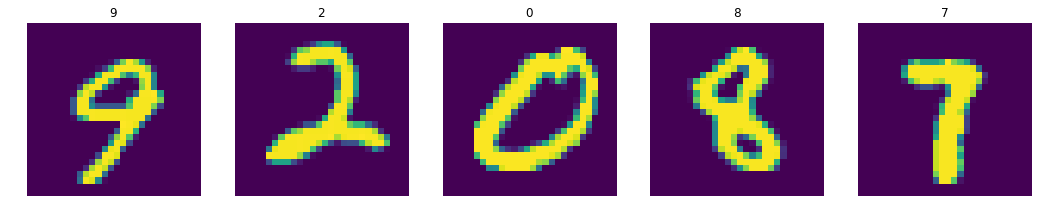

In [53]:
# Construindo e mostrando o mini-batch
idxs = np.arange(X_test.shape[0])
np.random.shuffle(idxs)
mini_batch_imgs_raw = X_test_raw[idxs[:5], :]
mini_batch_imgs = X_test[idxs[:5], :]
mini_batch_labels = np.argmax(model.predict_on_batch(mini_batch_imgs), axis=1)

plt.figure(figsize=(18,9))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(mini_batch_imgs_raw[i])
    plt.axis('off')
    plt.title(mini_batch_labels[i])

No **ConvLayer1**:

Working on filters: [9]
Working on filters: [2]
Working on filters: [0]
Working on filters: [8]
Working on filters: [7]


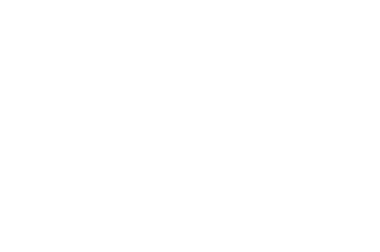

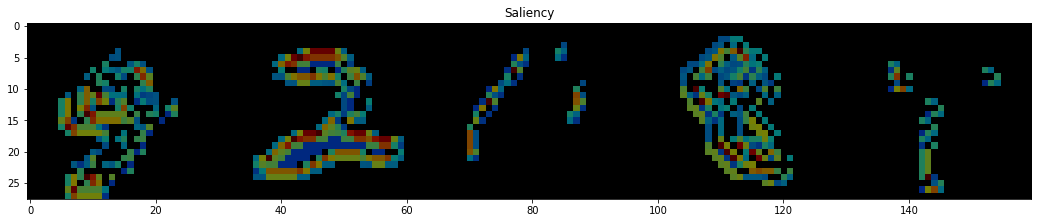

In [65]:
from keras.preprocessing.image import img_to_array

from vis.utils import utils
from vis.visualization import visualize_saliency, visualize_cam

# Carregando o layer
layer_name = 'conv1'
layer_idx = [idx for idx, layer in enumerate(model.layers) if layer.name == layer_name][0]

heat_maps = []

# Construindo os heat maps
for i in range(5):
    
    # Heat map
    heatmap = visualize_saliency(model, layer_idx, [mini_batch_labels[i]], mini_batch_imgs[i])
    heat_maps.append(heatmap)
    
plt.axis('off')
plt.figure(figsize=(18,9))
plt.imshow(utils.stitch_images(heat_maps))
plt.title('Saliency')
plt.show()

No **ConvLayer2**:

Working on filters: [9]
Working on filters: [2]
Working on filters: [0]
Working on filters: [8]
Working on filters: [7]


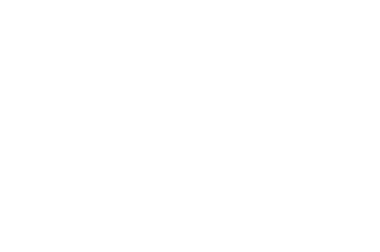

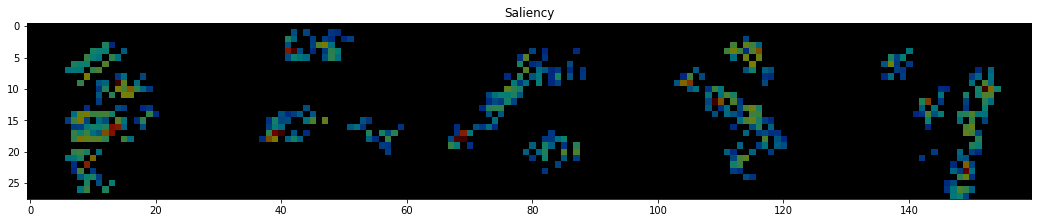

In [67]:
from keras.preprocessing.image import img_to_array

from vis.utils import utils
from vis.visualization import visualize_saliency, visualize_cam

# Carregando o layer
layer_name = 'conv2'
layer_idx = [idx for idx, layer in enumerate(model.layers) if layer.name == layer_name][0]

heat_maps = []

# Construindo os heat maps
for i in range(5):
    
    # Heat map
    heatmap = visualize_saliency(model, layer_idx, [mini_batch_labels[i]], mini_batch_imgs[i])
    heat_maps.append(heatmap)
    
plt.axis('off')
plt.figure(figsize=(18,9))
plt.imshow(utils.stitch_images(heat_maps))
plt.title('Saliency')
plt.show()